In [3]:
from dotenv import load_dotenv
load_dotenv( override=True)

True

my model this time is used for a movie recommendation assistant that uses RAG (Retrieval-Augmented Generation) to recommend movies based on a user’s query and a vector database of movie descriptions:

In [1]:
from langsmith import traceable
from openai import OpenAI
from typing import List
import nest_asyncio
from utils import get_vector_db_retriever
import os

MODEL_PROVIDER = "openai"
MODEL_NAME = "gpt-4o-mini"
APP_VERSION = 1.0

MOVIE_RAG_SYSTEM_PROMPT = """You are a helpful movie recommendation assistant.
Use the retrieved movie summaries or reviews as context to recommend movies based on the user's preferences.
If you don't find any relevant results, just say that you don’t have enough information.
"""

openai_client = OpenAI()
nest_asyncio.apply()
retriever = get_vector_db_retriever()  # retrieves data from a vector store of movie descriptions

@traceable
def retrieve_movie_data(query: str):
    return retriever.invoke(query)  # This .invoke() call will be automatically traced by LangChain

@traceable
def generate_movie_recommendations(query: str, movie_docs):
    formatted_docs = "\n\n".join(doc.page_content for doc in movie_docs)
    messages = [
        {
            "role": "system",
            "content": MOVIE_RAG_SYSTEM_PROMPT
        },
        {
            "role": "user",
            "content": f"Context: {formatted_docs}\n\nUser Query: {query}"
        }
    ]
    return call_openai(messages)

@traceable
def call_openai(
    messages: List[dict], model: str = MODEL_NAME, temperature: float = 0.7
) -> str:
    return openai_client.chat.completions.create(
        model=model,
        messages=messages,
        temperature=temperature,
    )

@traceable
def langsmith_movie_rag(query: str):
    movie_docs = retrieve_movie_data(query)
    response = generate_movie_recommendations(query, movie_docs)
    return response.choices[0].message.content


USER_AGENT environment variable not set, consider setting it to identify your requests.


In [2]:
print(langsmith_movie_rag("Suggest me feel-good comedy movies like The Intern."))

If you enjoyed "The Intern," here are some feel-good comedy movies you might like:

1. **About Time (2013)** - A romantic comedy that combines time travel with heartfelt moments, following a young man who discovers he can time travel and uses this ability to improve his life and relationships.

2. **Julie & Julia (2009)** - Starring Meryl Streep and Amy Adams, this film interweaves the lives of Julia Child and a young woman who aspires to cook all 524 recipes in Child's cookbook, showcasing passion and perseverance in a lighthearted manner.

3. **The Hundred-Foot Journey (2014)** - A delightful story about an Indian family opening a restaurant in France, which leads to culinary rivalry and cultural exchange. It’s filled with humor, heart, and delicious food.

4. **The Proposal (2009)** - Starring Sandra Bullock and Ryan Reynolds, this romantic comedy features a Canadian book editor who convinces her assistant to marry her to avoid deportation, leading to hilarious situations.

5. **Lit

similarly i have observed the run tree for this llm 

![Screenshot 2025-10-04 at 10.19.23 PM.png](<attachment:Screenshot 2025-10-04 at 10.19.23 PM.png>)

and many other thing like the one i had done in main notebook 
You can see it here 

https://smith.langchain.com/public/fdf0e8b1-0beb-4e9b-90b0-2ade35e5f6a4/r
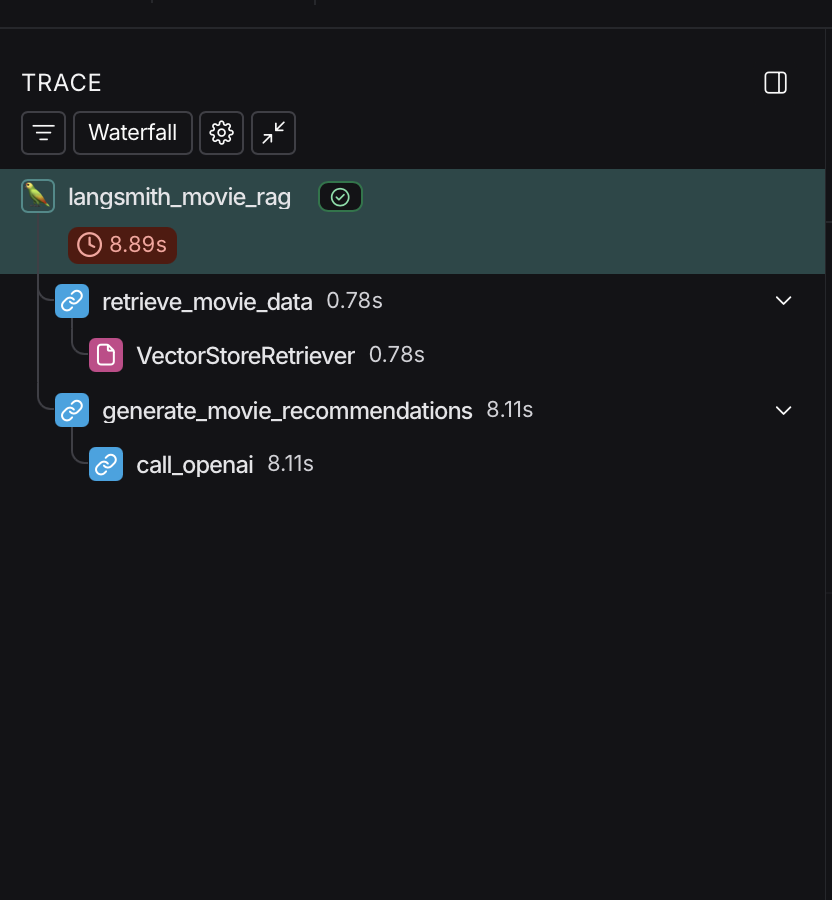